In [1]:
### Utenti Validi
# '2c938084683d9f87016d1636f55a00de': (u'Grazia Benedetti',True,"24.10.19","1.4.20")
# '2c938084683d9f87016ff0d54c3d0138': (u'Maria Luisa  Bortoluzzi',True,"29.1.20","1.5.20")
# '2c938084683d9f87016fd2ac0d240134': (u'Silvia Francescangeli',True,"23.1.20","1.5.20")
# '2c938084683d9f87016cd1cbb80100a7': (u'Enrico Vottero',True,"30.09.19","20.12.19")
# '2c938084683d9f87016d163666b900db': (u'Giorgio Bertolani',True,"9.10.19","20.12.19")}

### Setup delle librerie e connessione al database

In [2]:
import pymongo 
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from datetime import datetime
import math
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

import pickle

In [3]:
### connect to the db 
myclient = pymongo.MongoClient("mongodb://localhost:27018/")
mydb = myclient["mls"]
mycol = mydb["mqttlogs"]

### select a user and find all the respective entries
utente='2c938084683d9f87016d163666b900db'
print("PROCESSING USER:\n" + utente)

query = {'userid':utente}
db_entries = mycol.find(query)

PROCESSING USER:
2c938084683d9f87016d163666b900db


### Recupero di interventions e acks

In [4]:
ordered_interventions_id = []
interventions = dict()
acks = dict()

escape_interventions = ["641056j1-0g78-vjqf-cpju-7dnx895011y9"]

In [5]:
print("loading for interventions and acks from file")
data_file = open("./data_interventions_"+str(utente)+".pkl", "rb")
ordered_interventions_id,interventions,acks,dangling_interventions,times = pickle.load(data_file)
data_file.close()

loading for interventions and acks from file


### Recupero delle run

In [6]:
print("loading runs from file")
data_file = open("./run_fullcomunication_"+str(utente)+".pkl", "rb")
run = pickle.load(data_file)
data_file.close()

loading runs from file


In [7]:
len(run)

347

### Estrazione delle informazioni

In [8]:
coordinates = []
x = []
y = []
t = []
tp = []

for r in run :
    x = []
    y = []
    t = []
    tp = []
    for i in range(len(r)) : 
        s = r[i]['raw_payload']['data']['pose']
        tplace = r[i]['raw_payload']['data']['topological_place']
        if s !='[]' : # and tplace != 'NOT_AVAILABLE'
            a = list(map(float,s[1:-1].split(" ")))
            x.append(a[0])
            y.append(a[1])
            t.append(r[i]['raw_payload']['time']['t'])
            tp.append(tplace)
    coordinates.append([x,y,t,tp])

In [9]:
len(coordinates)

347

In [10]:
print("valid runs with no topological place indications")
num = 0
for x,y,t,tp in coordinates : 
    if 'NOT_AVAILABLE' in tp :
        print("run "+str(num))
    num += 1

valid runs with no topological place indications
run 0
run 1
run 9


### Plot delle coordinate

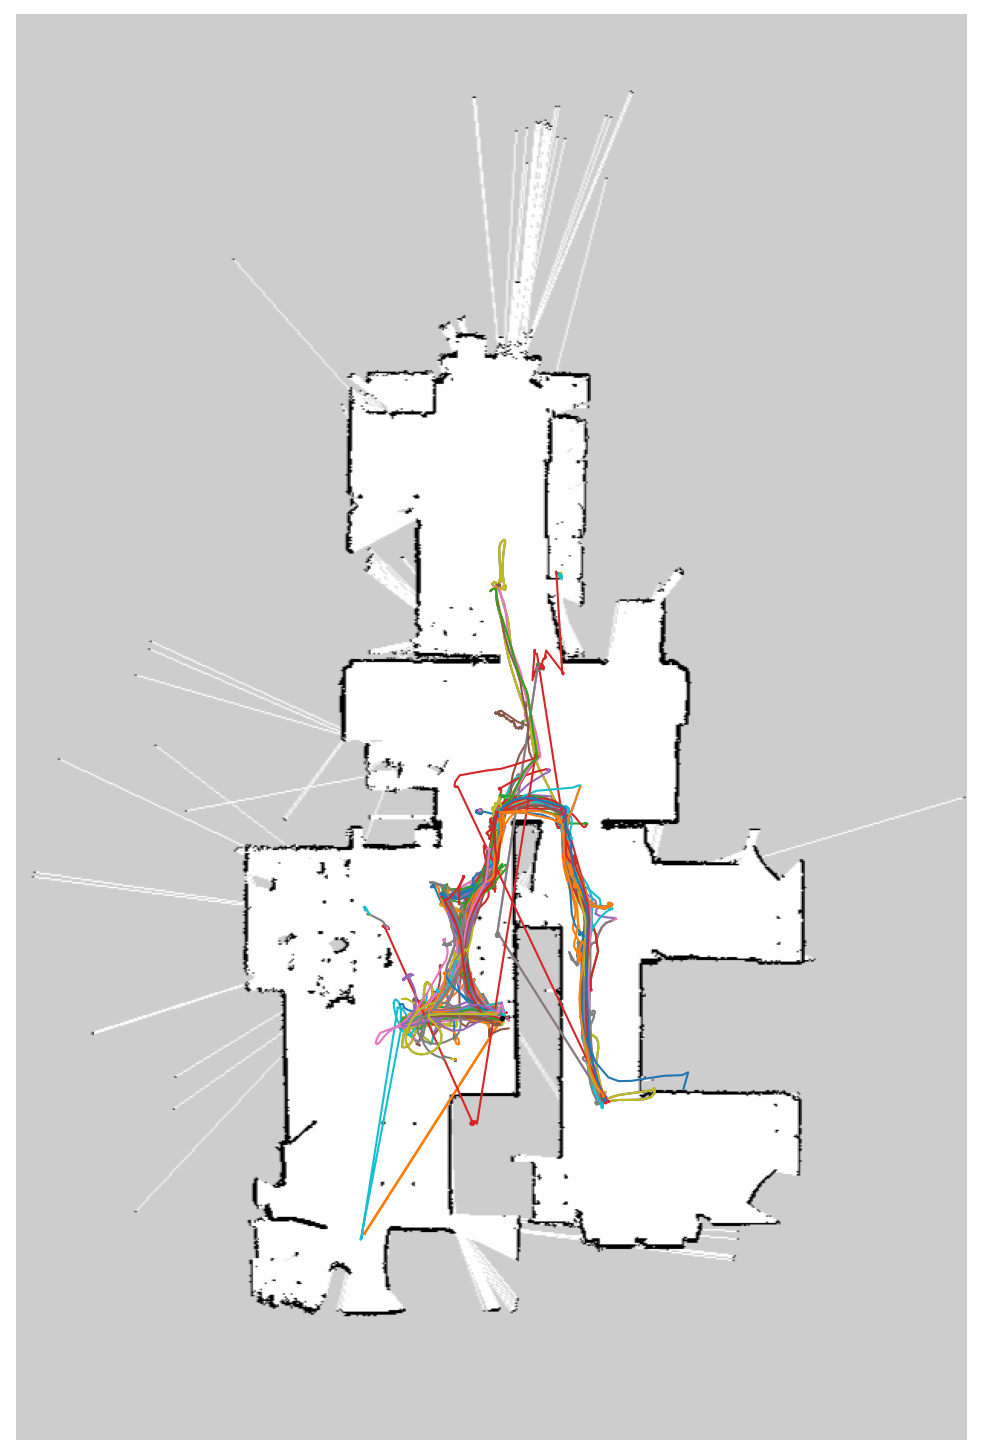

In [11]:
img = plt.imread("./mapsIT/"+str(utente)+".png")
fig, ax = plt.subplots(figsize = (10,10))

imagebox = OffsetImage(img, zoom = 1.1, cmap = 'gist_gray')
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, (-0.2,5.2), xycoords = 'data', bboxprops = {'lw':0}, zorder = 0)
ax.add_artist(ab)

for x,y,t,tp in coordinates : 
    plt.plot(x,y)

plt.plot(0,0,'.k')
plt.axis('equal')
plt.axis('off')
fig.savefig("./trajectories/complete/"+utente+"_complete_onMap.pdf", bbox_inches = 'tight')

### Plot delle coordinate e delle informazioni di una singola run

52
cambio di topological-place alle coordinate:


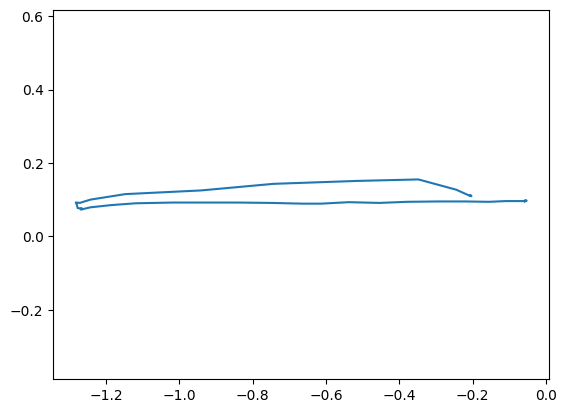

In [12]:
f = plt.figure()
run_count = 0
selected_run = 16
print(len(coordinates[selected_run][3]))
print("cambio di topological-place alle coordinate:")
num = 1

for x,y,t,tp in coordinates :  
    if run_count == selected_run :
        plt.plot(x,y)
        prec = tp[0]
        pose_number = 0
        for j in tp :
            if j != prec :
                print(str(x[pose_number]), str(y[pose_number])+" tra "+prec+" e "+j)
                plt.plot(x[pose_number], y[pose_number], 'k.')
                plt.text(x[pose_number], y[pose_number],str(num))
                num += 1
            prec = j
            pose_number += 1
    run_count += 1

plt.axis('equal')
plt.show()